In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [253]:
filepath='E:/Data analysis/Personal Project/Uni_Rating/data/clean_Rating_data.csv'
df = pd.read_csv(filepath)

In [254]:
df

,Sex,Age,Year,Program,Facilities,Club,Environment,Opportunities,Faculties,Overall
0,Male,18,First year,5,5,4,5,6,5,5
1,Male,18,First year,5,5,5,6,4,5,5
2,Male,20,Third year,4,5,3,3,6,3,4
3,Female,19,Second year,4,5,6,3,2,2,3
4,Female,18,First year,5,6,4,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...
122,Male,21,Fourth year,4,4,5,4,3,4,4
123,Female,21,Fourth year,5,6,4,5,4,6,5
124,Male,21,Fourth year,4,4,3,4,5,3,4
125,Male,22,First year,5,5,4,5,4,4,5


In [255]:
#Display the data types of each column
df.dtypes

Sex              object
Age               int64
Year             object
Program           int64
Facilities        int64
Club              int64
Environment       int64
Opportunities     int64
Faculties         int64
Overall           int64
dtype: object

In [256]:
df.describe()

,Age,Program,Facilities,Club,Environment,Opportunities,Faculties,Overall
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,19.173228,4.464567,4.811024,4.125984,4.543307,4.574803,4.456693,4.322835
std,1.608975,1.104071,1.239126,1.227930,1.139172,1.185358,1.283323,1.068168
min,17.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,18.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
50%,19.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000
75%,20.000000,5.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000
max,24.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [257]:
Rating =["Program","Facilities","Club","Environment","Opportunities","Faculties","Overall"]
df

,Sex,Age,Year,Program,Facilities,Club,Environment,Opportunities,Faculties,Overall
0,Male,18,First year,5,5,4,5,6,5,5
1,Male,18,First year,5,5,5,6,4,5,5
2,Male,20,Third year,4,5,3,3,6,3,4
3,Female,19,Second year,4,5,6,3,2,2,3
4,Female,18,First year,5,6,4,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...
122,Male,21,Fourth year,4,4,5,4,3,4,4
123,Female,21,Fourth year,5,6,4,5,4,6,5
124,Male,21,Fourth year,4,4,3,4,5,3,4
125,Male,22,First year,5,5,4,5,4,4,5


In [258]:
df["Sex"]=df["Sex"].replace("Male",1)
df["Sex"]=df["Sex"].replace("Female",0)
df["Sex"]=df["Sex"].replace("Prefer not to say", -1)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_8188\170887266.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"]=df["Sex"].replace("Prefer not to say", -1)


,Sex,Age,Year,Program,Facilities,Club,Environment,Opportunities,Faculties,Overall
0,1,18,First year,5,5,4,5,6,5,5
1,1,18,First year,5,5,5,6,4,5,5
2,1,20,Third year,4,5,3,3,6,3,4
3,0,19,Second year,4,5,6,3,2,2,3
4,0,18,First year,5,6,4,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...
122,1,21,Fourth year,4,4,5,4,3,4,4
123,0,21,Fourth year,5,6,4,5,4,6,5
124,1,21,Fourth year,4,4,3,4,5,3,4
125,1,22,First year,5,5,4,5,4,4,5


In [259]:
df[Rating] = df[Rating].replace(to_replace=[1, 2],value=0)
df[Rating] = df[Rating].replace(to_replace=[3, 4],value=1)
df[Rating] = df[Rating].replace(to_replace=[5, 6],value=2)
df.drop(['Sex'], axis=1, inplace=True)
df.drop(['Year'], axis=1, inplace=True)
df.drop(['Age'], axis=1, inplace=True)
df

,Program,Facilities,Club,Environment,Opportunities,Faculties,Overall
0,2,2,1,2,2,2,2
1,2,2,2,2,1,2,2
2,1,2,1,1,2,1,1
3,1,2,2,1,0,0,1
4,2,2,1,1,1,1,1
...,...,...,...,...,...,...,...
122,1,1,2,1,1,1,1
123,2,2,1,2,1,2,2
124,1,1,1,1,2,1,1
125,2,2,1,2,1,1,2


In [260]:
df.corr()

,Program,Facilities,Club,Environment,Opportunities,Faculties,Overall
Program,1.000000,0.561047,0.388053,0.565519,0.416853,0.553295,0.611480
Facilities,0.561047,1.000000,0.436295,0.546836,0.386886,0.525466,0.662966
Club,0.388053,0.436295,1.000000,0.410807,0.258510,0.285700,0.521045
Environment,0.565519,0.546836,0.410807,1.000000,0.305939,0.504083,0.677579
Opportunities,0.416853,0.386886,0.258510,0.305939,1.000000,0.420703,0.384716
Faculties,0.553295,0.525466,0.285700,0.504083,0.420703,1.000000,0.564743
Overall,0.611480,0.662966,0.521045,0.677579,0.384716,0.564743,1.000000


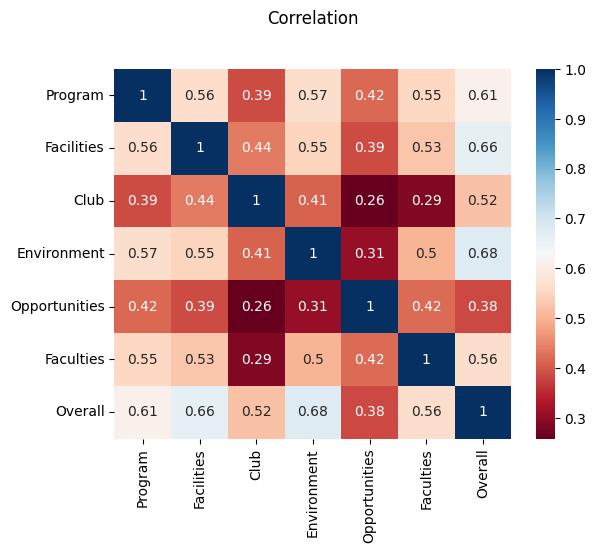

In [261]:
sns.heatmap(df.corr(), cmap="RdBu", annot=True) 
plt.title('Correlation', y=1.1)
plt.show()

In [262]:
y_data = df['Overall']
x_data=df.drop('Overall',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 26
number of training samples: 101


In [263]:
logr = linear_model.LogisticRegression()
logr.fit(x_train,y_train)
y_pred = logr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 84.62%


In [264]:
 # evaluate the model
cfs = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cfs)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 1  0  0]
 [ 0 10  3]
 [ 0  1 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.91      0.77      0.83        13
           2       0.79      0.92      0.85        12

    accuracy                           0.85        26
   macro avg       0.90      0.90      0.89        26
weighted avg       0.86      0.85      0.85        26



Text(0.5, 23.52222222222222, 'Predicted label')

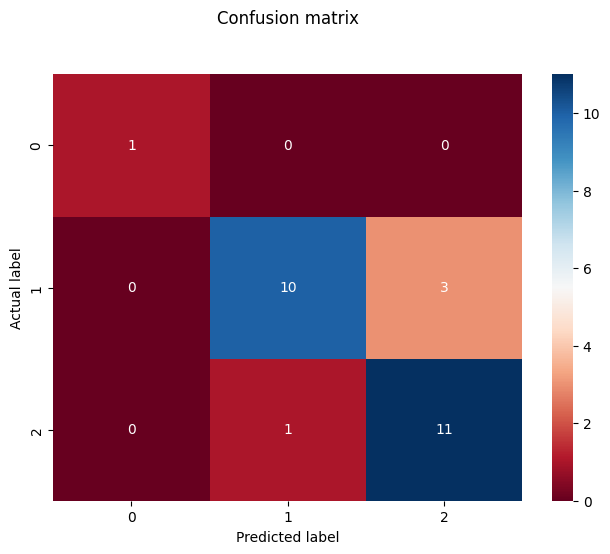

In [265]:
sns.heatmap(pd.DataFrame(cfs), annot=True, cmap="RdBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [266]:
df_dummies = pd.get_dummies(df, prefix='', prefix_sep='_', 
                            columns=["Program","Facilities","Club","Environment","Opportunities","Faculties","Overall"])
df_dummies

,_0,_1,_2,_0,_1,_2,_0,_1,_2,_0,...,_2,_0,_1,_2,_0,_1,_2,_0,_1,_2
0,False,False,True,False,False,True,False,True,False,False,...,True,False,False,True,False,False,True,False,False,True
1,False,False,True,False,False,True,False,False,True,False,...,True,False,True,False,False,False,True,False,False,True
2,False,True,False,False,False,True,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,False,True,False,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
4,False,False,True,False,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,False,True,False,False,True,False,False,False,True,False,...,False,False,True,False,False,True,False,False,True,False
123,False,False,True,False,False,True,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True
124,False,True,False,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
125,False,False,True,False,False,True,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True
